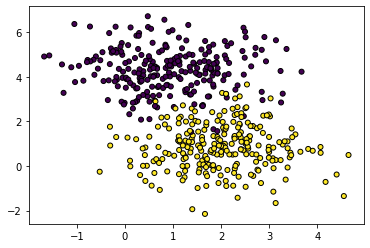

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [2]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X.shape)
print(y.shape)

(500, 2)
(500,)


### Add intercept on X_train & X_test

In [4]:
X_train = np.insert(X_train, 0, 1, axis = 1)
X_test = np.insert(X_test, 0,1 ,axis=1)

In [5]:
print(X_train.shape)
print(y_train.shape)

(350, 3)
(350,)


In [6]:
class LogisticRegression:
    
    def __init__(self, max_iter = 10000, alpha = 0.001, batch= 0.1):
        self.max_iter = max_iter
        self.alpha = alpha
        self.batch = batch
        self.theta = 0
        self.gradient = 0
        self.loss_record = 0
        self.iter = 0

        
        
    def fit(self, X_train, y_train):
        #the followin is local variables
        error_record = []
        loss_record = [100,10]
        gradient_record = []
        theta = np.zeros(X_train.shape[1])
        all_index = np.arange(len(X_train))
        batch_size = int(self.batch * len(X_train))
        count = 0
        
        
        for i in np.arange(self.max_iter):
            if np.abs(loss_record[-1] - loss_record[-2]) > 0.0001:
                if len(all_index) != 0:

                    random_index = np.random.choice(all_index)

                    predicted = X_train[random_index: random_index + batch_size] @ theta
                    sigmoid_predicted = 1 / (1+ (np.exp(-1 * predicted))) #yield result ranging from 0 to 1
                    error = sigmoid_predicted - y_train[random_index: random_index + batch_size] 
                    loss = - np.sum(y_train[random_index: random_index + batch_size] * np.log(sigmoid_predicted) + 
                                    (1-y_train[random_index: random_index + batch_size]) * np.log(1-sigmoid_predicted))
                    gradient = X_train[random_index: random_index + batch_size].T @ error
                    theta = theta - (self.alpha * gradient)
                    count +=1

                    error_record.append(error)
                    loss_record.append(loss)
                    gradient_record.append(gradient)

                    #np.delete will result in problems
                    all_index = all_index[all_index != random_index]
                    
                    
                    #to update the attribute of funciton
                    self.theta = theta
                    self.gradient = gradient
                    self.loss_record = loss_record
                    self.iter = count

                else:
                    all_index = np.arange(len(X_train))

            else:
                break
        
    def predict(self, X):
        predicted = X @ self.theta
        sigmoid_predicted = np.round(1 / (1+ (np.exp(-1 * predicted))))
        return sigmoid_predicted
    
    
    def plot(self):
        plt.plot(np.arange(self.iter), self.loss_record[2:])
        plt.xlabel('iteration')
        plt.ylabel('loss function')

## Create a model from class

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [8]:
yhat = model.predict(X_test)
yhat

array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.])

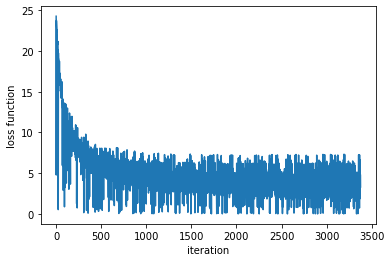

In [9]:
model.plot()

In [10]:
print(model.theta)
print(model.loss_record[-2:])
print(model.iter)

[ 0.01025024  1.18340578 -4.4384579 ]
[3.311550088925135, 3.311619966354952]
3377


## Summary from training the data
- after repeating over 3,377 times, the model early stops as the delta between loss < threshold
- the final theta, to be used for test data = [ 0.01025024  1.18340578 -4.4384579 ]

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(yhat, y_test)

0.96

## Prediction on the test set

In [12]:
yhat = model.predict(X_test)
print(yhat)

[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 0.]


In [13]:
#using sklearn to prove the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(yhat, y_test)

array([[68,  4],
       [ 2, 76]])

In [14]:
accuracy_score(yhat, y_test)

0.96

## Create Classification_report() class

In [15]:
class classification_report:
    
    def __init__(self, actual, predicted):
        self.actual = actual
        self.predicted = predicted
        self.true_pos = np.sum((self.actual == 1) & (self.predicted == 1))
        self.true_neg = np.sum((self.actual == 0) & (self.predicted == 0))
        self.false_pos = np.sum((self.actual == 0)& (self.predicted == 1))
        self.false_neg = np.sum((self.actual == 1)& (self.predicted == 0))
        self.report()
        
        
    def accuracy(self):
        self.accuracy = (self.true_pos + self.true_neg) / (self.true_pos + self.true_neg + self.false_pos + self.false_neg)
        return self.accuracy
    
    
    def precision(self):
        self.precision = self.true_pos / (self.true_pos +self.false_pos)
        return self.precision
    
    def recall(self):
        self.recall =  self.true_pos / (self.true_pos +self.false_neg)
        return self.recall,2
    
    def f1(self):
        self.f1 = 2 * (self.precision * self.recall) / (self.precision + self.recall)
        
    def report(self):
        self.accuracy()
        self.precision()
        self.recall()
        self.f1()
        print(f'accuracy : {round(self.accuracy,2)}')
        print(f'precision: {round(self.precision,2)}')
        print(f'recall   : {round(self.recall, 2)}')
        print(f'f1      : {round(self.f1,2)}')
        
    
        

In [16]:
metrics = classification_report(actual = y_test, predicted = yhat)

accuracy : 0.96
precision: 0.97
recall   : 0.95
f1      : 0.96


In [17]:
print(metrics.true_pos)
print(metrics.true_neg)
print(metrics.false_pos)
print(metrics.false_neg)

76
68
2
4


## Summary from testing the data
- Using both sklearn and from-scratch report class, the model yields the same accuracy score of 96%

---